In [2]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image




In [4]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [5]:
# Dataset paths
dataset_path = "/content/drive/MyDrive/Colab/dataset/"  # Path to your dataset in Drive
output_path = "/content/drive/MyDrive/Colab/output_images/"  # Path to save images in Google Drive



In [6]:
# Ensure output directories exist
classes = ['Arcing', 'Corona', 'Looseness', 'Tracking']
for cls in classes:
    os.makedirs(os.path.join(output_path, cls), exist_ok=True)



In [7]:
# Parameters
segment_duration = 0.5  # 0.5 seconds per segment
overlap_duration = 0.2  # Overlap duration
sample_rate = 22050     # Audio sampling rate



In [8]:
# Process each audio file
for file in os.listdir(dataset_path):
    if file.endswith(".wav"):
        file_path = os.path.join(dataset_path, file)
        class_name = next((cls for cls in classes if cls.lower() in file.lower()), None)
        if not class_name:
            continue  # Skip files with unknown class

        # Load audio file
        audio, sr = librosa.load(file_path, sr=sample_rate)



In [10]:
# Calculate segment parameters
segment_samples = int(segment_duration * sr)
step_samples = int((segment_duration - overlap_duration) * sr)


In [12]:
# Create segments and save as images
for i in range(0, len(audio) - segment_samples, step_samples):
    segment = audio[i:i + segment_samples]

    # Generate Mel Spectrogram
    S = librosa.feature.melspectrogram(y=segment, sr=sr)
    S_dB = librosa.power_to_db(S, ref=np.max)

    # Save as black & white image
    plt.figure(figsize=(1, 1), dpi=64)
    librosa.display.specshow(S_dB, cmap='gray_r')
    plt.axis('off')
    img_path = os.path.join(output_path, class_name, f"{file}_segment_{i}.png")
    plt.savefig(img_path, bbox_inches='tight', pad_inches=0)
    plt.close()


In [14]:
# Create segments and save as images
for i in range(0, len(audio) - segment_samples, step_samples):
    segment = audio[i:i + segment_samples]

    # Generate Mel Spectrogram
    S = librosa.feature.melspectrogram(y=segment, sr=sr)
    S_dB = librosa.power_to_db(S, ref=np.max)

    # Save as black & white image
    plt.figure(figsize=(1, 1), dpi=64)
    librosa.display.specshow(S_dB, cmap='gray_r')
    plt.axis('off')

    # Save image to the correct folder
    img_path = os.path.join(output_path, class_name, f"{file}_segment_{i}.png")
    plt.savefig(img_path, bbox_inches='tight', pad_inches=0)
    plt.close()


In [16]:
# Create segments and save as images
for i in range(0, len(audio) - segment_samples, step_samples):
    segment = audio[i:i + segment_samples]

    # Generate Mel Spectrogram
    S = librosa.feature.melspectrogram(y=segment, sr=sr)
    S_dB = librosa.power_to_db(S, ref=np.max)

    # Save as black & white image
    plt.figure(figsize=(1, 1), dpi=64)
    librosa.display.specshow(S_dB, cmap='gray_r')
    plt.axis('off')

    # Save image to the correct folder
    img_path = os.path.join(output_path, class_name, f"{file}_segment_{i}.png")
    plt.savefig(img_path, bbox_inches='tight', pad_inches=0)
    plt.close()


In [17]:
print("Image generation complete! Images are saved in respective folders in Google Drive.")

Image generation complete! Images are saved in respective folders in Google Drive.


In [18]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [21]:
# Data paths
dataset_path = '/content/drive/MyDrive/Colab/output_images/'
img_size = (224, 224)
batch_size = 32

In [22]:
# Data Generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 72 images belonging to 4 classes.
Found 17 images belonging to 4 classes.


In [23]:
# Model Architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')  # 4 output classes: Arcing, Corona, Looseness, Tracking
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
# Train the Model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.3278 - loss: 0.9597 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 1.0000 - loss: 0.0000e+0

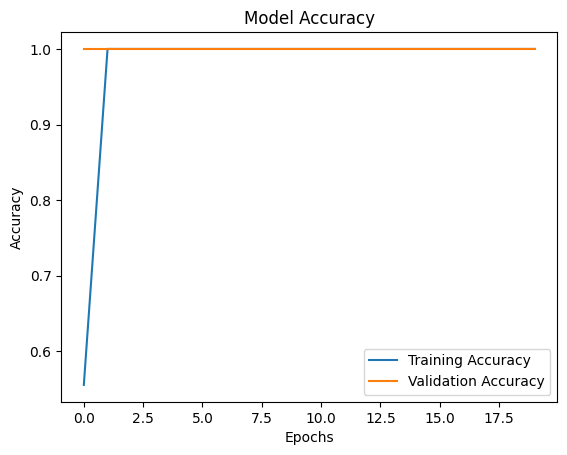

In [26]:
# Plot Training Results
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [38]:
import os
import shutil
import random
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [39]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
# Data paths
dataset_path = '/content/drive/MyDrive/Colab/dataset/'
output_path = '/content/drive/MyDrive/Colab/output_images/'
train_path = '/content/drive/MyDrive/Colab/train_data/'
test_path = '/content/drive/MyDrive/Colab/test_data/'

In [42]:
# Ensure output directories exist
classes = ['Arcing', 'Corona', 'Looseness', 'Tracking']
for cls in classes:
    os.makedirs(os.path.join(output_path, cls), exist_ok=True)
    os.makedirs(os.path.join(train_path, cls), exist_ok=True)
    os.makedirs(os.path.join(test_path, cls), exist_ok=True)


In [43]:
# Parameters
segment_duration = 0.5  # 0.5 seconds per segment
overlap_duration = 0.2  # Overlap duration
sample_rate = 22050     # Audio sampling rate

In [52]:
# Step 1: Generate Images from .wav Files
for file in os.listdir(dataset_path):
    if file.endswith(".wav"):
        file_path = os.path.join(dataset_path, file)
        class_name = next((cls for cls in classes if cls.lower() in file.lower()), None)
        if not class_name:
            continue  # Skip files with unknown class
             # Load audio file
        audio, sr = librosa.load(file_path, sr=sample_rate)
            # Calculate segment parameters
        segment_samples = int(segment_duration * sr)
        step_samples = int((segment_duration - overlap_duration) * sr)
           # Create segments and save as images
        for i in range(0, len(audio) - segment_samples, step_samples):
            segment = audio[i:i + segment_samples]
             # Generate Mel Spectrogram
            S = librosa.feature.melspectrogram(y=segment, sr=sr)
            S_dB = librosa.power_to_db(S, ref=np.max)
            # Save as black & white image
            plt.figure(figsize=(1, 1), dpi=64)
            librosa.display.specshow(S_dB, cmap='gray_r')
            plt.axis('off')
            img_path = os.path.join(output_path, class_name, f"{file}_segment_{i}.png")
            plt.savefig(img_path, bbox_inches='tight', pad_inches=0)
            plt.close()

In [53]:
# Step 2: Split Data (80% Training, 20% Testing)
for cls in classes:
    class_path = os.path.join(output_path, cls)
    class_files = os.listdir(class_path)
    random.shuffle(class_files)
    split_index = int(0.8 * len(class_files))

    for file in class_files[:split_index]:
        shutil.copy(os.path.join(class_path, file), os.path.join(train_path, cls))
    for file in class_files[split_index:]:
        shutil.copy(os.path.join(class_path, file), os.path.join(test_path, cls))


In [54]:
# Step 3: Data Generators
img_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 1584 images belonging to 4 classes.
Found 398 images belonging to 4 classes.


In [55]:
# Step 4: Model Architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')  # 4 output classes: Arcing, Corona, Looseness, Tracking
])


In [56]:
# Step 5: Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [57]:
# Step 6: Train the Model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 197s 4s/step - accuracy: 0.2730 - loss: 1.4931 - val_accuracy: 0.3317 - val_loss: 1.2511
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 192s 4s/step - accuracy: 0.4402 - loss: 1.1895 - val_accuracy: 0.5101 - val_loss: 1.0630
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 192s 4s/step - accuracy: 0.5995 - loss: 0.9793 - val_accuracy: 0.6256 - val_loss: 0.8688
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 193s 4s/step - accuracy: 0.6853 - loss: 0.7788 - val_accuracy: 0.6809 - val_loss: 0.7643
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 192s 4s/step - accuracy: 0.7474 - loss: 0.6234 - val_accuracy: 0.6709 - val_loss: 0.7626
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 196s 4s/step - accuracy: 0.8165 - loss: 0.4723 - val_accuracy: 0.7111 - val_loss: 0.7216
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 192s 4s/step - accuracy: 0.8841 - loss: 0.3252 - val_accuracy: 0.7060 - val_loss: 0.7595
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 191s 4s/step - accuracy: 0.9033 - loss: 0.2563 - val_accuracy: 0.6658 - v

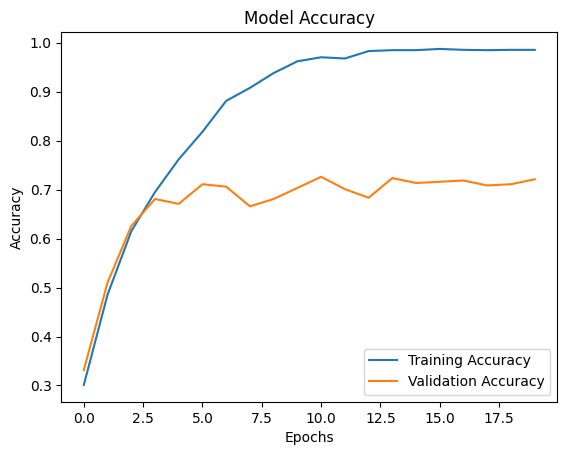

In [58]:
# Step 7: Plot Training Results
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [61]:
# Step 8: Evaluate the Model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7442 - loss: 1.2597
Test Accuracy: 72.11%


13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step


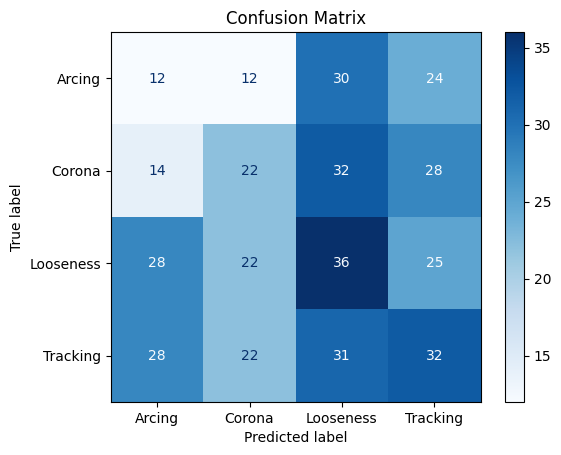

In [62]:
# Step 9: Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()